#  Load data from csv to dataframe

In [1]:
import pandas as pd
import numpy as np
rainfall_df = pd.read_csv("E:\ml\selectedDatasets\Final\weatherAUS\weatherAUS.csv")
print("size of the data frame is : ", rainfall_df.shape)
rainfall_df[0:5]

size of the data frame is :  (145460, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [2]:
#find out column with max null values
rainfall_df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RISK_MM          142193
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

# Data Pre-Processing

In [3]:
# As we can see the first four columns have less than 60% data, we can ignore these four columns
# We don't need the location column because 
# we are going to find if it will rain in Australia(not location specific)
# We are going to drop the date column too.
# We need to remove RISK_MM because we want to predict 'RainTomorrow' and RISK_MM can leak some info to our model
rainfall_df = rainfall_df.drop(columns=["Sunshine","Evaporation","Cloud3pm","Cloud9am","Location","Date","RISK_MM"],axis =1)

In [4]:

print("size of the data frame is : ", rainfall_df.shape)
rainfall_df[0:5]

size of the data frame is :  (145460, 17)


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [5]:
#elimination of null values
rainfall_df = rainfall_df.dropna()
rainfall_df.shape

(112925, 17)

In [6]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 17 columns):
MinTemp          112925 non-null float64
MaxTemp          112925 non-null float64
Rainfall         112925 non-null float64
WindGustDir      112925 non-null object
WindGustSpeed    112925 non-null float64
WindDir9am       112925 non-null object
WindDir3pm       112925 non-null object
WindSpeed9am     112925 non-null float64
WindSpeed3pm     112925 non-null float64
Humidity9am      112925 non-null float64
Humidity3pm      112925 non-null float64
Pressure9am      112925 non-null float64
Pressure3pm      112925 non-null float64
Temp9am          112925 non-null float64
Temp3pm          112925 non-null float64
RainToday        112925 non-null object
RainTomorrow     112925 non-null object
dtypes: float64(12), object(5)
memory usage: 15.5+ MB


In [7]:
#outliners in data is being remove using the z score. elimating data with z score more than 3
from scipy import stats
z_score = np.abs(stats.zscore(rainfall_df._get_numeric_data()))
print(z_score)
rainfall_df = rainfall_df[(z_score<3).all(axis = 1)]

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]


In [8]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107868 entries, 0 to 145458
Data columns (total 17 columns):
MinTemp          107868 non-null float64
MaxTemp          107868 non-null float64
Rainfall         107868 non-null float64
WindGustDir      107868 non-null object
WindGustSpeed    107868 non-null float64
WindDir9am       107868 non-null object
WindDir3pm       107868 non-null object
WindSpeed9am     107868 non-null float64
WindSpeed3pm     107868 non-null float64
Humidity9am      107868 non-null float64
Humidity3pm      107868 non-null float64
Pressure9am      107868 non-null float64
Pressure3pm      107868 non-null float64
Temp9am          107868 non-null float64
Temp3pm          107868 non-null float64
RainToday        107868 non-null object
RainTomorrow     107868 non-null object
dtypes: float64(12), object(5)
memory usage: 14.8+ MB


In [9]:
#replacing yes/no with 1/0
rainfall_df["RainToday"].replace({'No' :0 ,'Yes': 1},inplace = True)
rainfall_df["RainTomorrow"].replace({'No' :0 ,'Yes': 1},inplace = True)

In [10]:
rainfall_eda = rainfall_df.copy()
rainfall_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107868 entries, 0 to 145458
Data columns (total 17 columns):
MinTemp          107868 non-null float64
MaxTemp          107868 non-null float64
Rainfall         107868 non-null float64
WindGustDir      107868 non-null object
WindGustSpeed    107868 non-null float64
WindDir9am       107868 non-null object
WindDir3pm       107868 non-null object
WindSpeed9am     107868 non-null float64
WindSpeed3pm     107868 non-null float64
Humidity9am      107868 non-null float64
Humidity3pm      107868 non-null float64
Pressure9am      107868 non-null float64
Pressure3pm      107868 non-null float64
Temp9am          107868 non-null float64
Temp3pm          107868 non-null float64
RainToday        107868 non-null int64
RainTomorrow     107868 non-null int64
dtypes: float64(12), int64(2), object(3)
memory usage: 14.8+ MB


In [11]:
corrMatrix = rainfall_df.corr()
print (corrMatrix)

                MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.731850  0.060468       0.172115      0.161147   
MaxTemp        0.731850  1.000000 -0.159865       0.079976      0.007844   
Rainfall       0.060468 -0.159865  1.000000       0.129801      0.070536   
WindGustSpeed  0.172115  0.079976  0.129801       1.000000      0.556157   
WindSpeed9am   0.161147  0.007844  0.070536       0.556157      1.000000   
WindSpeed3pm   0.158273  0.030035  0.057727       0.660688      0.458910   
Humidity9am   -0.229948 -0.517233  0.293940      -0.199390     -0.233385   
Humidity3pm    0.022874 -0.496843  0.302529      -0.040855     -0.031693   
Pressure9am   -0.457125 -0.349210 -0.170271      -0.415008     -0.171868   
Pressure3pm   -0.470082 -0.447246 -0.103090      -0.369009     -0.122176   
Temp9am        0.901086  0.883554 -0.060406       0.142709      0.100454   
Temp3pm        0.707920  0.984985 -0.164667       0.044740     -0.003064   
RainToday   

In [12]:

#in categorical values unique values are taken and converted into numerical using getDummies()
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(rainfall_df[col]))
    
rainfall_df = pd.get_dummies(rainfall_df,columns=categorical_columns)
rainfall_df[0:5]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#standaradizng data using MinMaxScalar
from sklearn import preprocessing
scale = preprocessing.MinMaxScaler()
scale.fit(rainfall_df)
rainfall_df = pd.DataFrame(scale.transform(rainfall_df),index = rainfall_df.index, columns = rainfall_df.columns)
rainfall_df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection - Univariate Feature Selection

In [14]:
#feature selection for the
#find out important features which influence the variable Rain Tomorrow
from sklearn.feature_selection import SelectKBest, chi2
X = rainfall_df.loc[:,rainfall_df.columns != 'RainTomorrow']
y = rainfall_df[['RainTomorrow']]
features = SelectKBest(chi2,k = 3)
features.fit(X,y)
X_new = features.transform(X)
print(X_new)
print("Top 3 features : ",X.columns[features.get_support(indices = True)])

[[0.02142857 0.22       0.        ]
 [0.         0.25       0.        ]
 [0.         0.3        0.        ]
 ...
 [0.         0.21       0.        ]
 [0.         0.24       0.        ]
 [0.         0.24       0.        ]]
Top 3 features :  Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


# check the distribution of the indepednent variable

Text(0, 0.5, 'RainTomorrow')

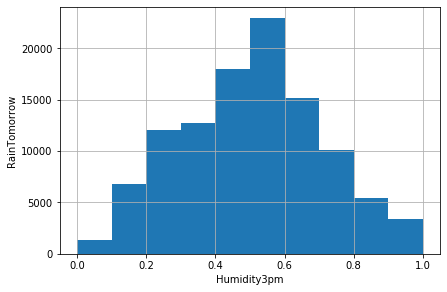

In [17]:
# verify the distribution of the top 3 features
# out of which Humidity3pm has a normal distribution, the rest are skwed, and thus thats the best feature
# thus we take taht g=feature as X
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
    
plt.subplot(2, 2, 1)
fig = rainfall_df.Humidity3pm.hist(bins=10)
fig.set_xlabel('Humidity3pm')
fig.set_ylabel('RainTomorrow')

In [18]:
# the above three features are least corelated with each other and Humidity3pm has a better corelation to target variable and thus it can be selected as a feature.
rainfall_df = rainfall_df[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]
X = rainfall_df[['Humidity3pm']]
y = rainfall_df[['RainTomorrow']]

# Distrbution of values in each category

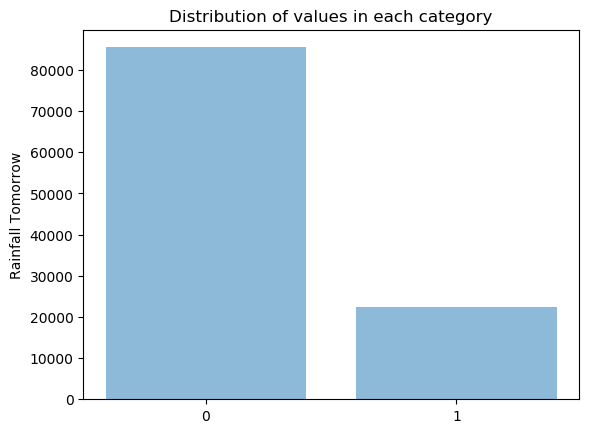

In [19]:
temp_graph = rainfall_df["RainTomorrow"].value_counts().copy()
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = [0,1]
y_pos = np.arange(len(objects))
performance = [temp_graph[0],temp_graph[1]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Rainfall Tomorrow')
plt.title('Distribution of values in each category')

plt.show()

# Resampling

In [20]:
# performing under and over sampling due to imbalence in data
from imblearn.over_sampling import SMOTE
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

X = rainfall_df[['Humidity3pm']]
y = rainfall_df[["RainTomorrow"]]
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Distribution of values after Resampling

1.0    85475
0.0    85475
dtype: int64

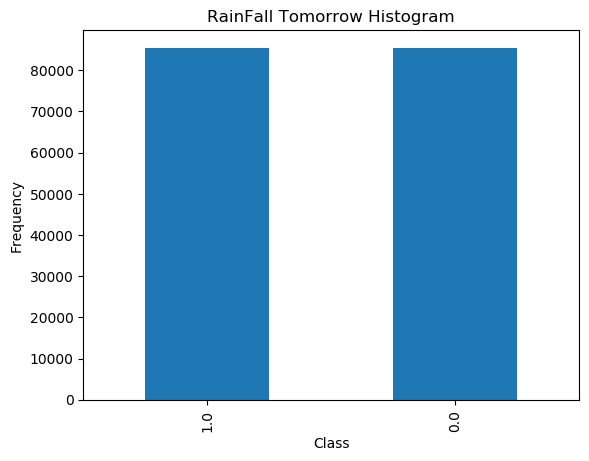

In [21]:
pd.value_counts(y_sm).plot.bar()
plt.title('RainFall Tomorrow Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_sm)

# Support Vector Machine Model

In [22]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

t0 = time.time()
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.25)
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train,y_train)
y_predict = clf_svc.predict(X_test)
score = accuracy_score(y_test,y_predict)
classification_report = classification_report(y_test,y_predict)
confusionMatrix = confusion_matrix(y_test,y_predict)
precisionScore = precision_score(y_test,y_predict)
recallScore = recall_score(y_test,y_predict)
f1Score = f1_score(y_test,y_predict,)
rocCurve = roc_curve(y_test,y_predict)

# print("\nroc Curve : \n\n")
# print(rocCurve) #only for binary classification
print("\nF1 Measure Score : ",f1Score)
print("\nRecall Score : ", recallScore)
print("\nPrecison Score : ",precisionScore)
print("\nAccuracy : " ,score)
print('\nConfusion matrix\n\n', confusionMatrix)

print('\nTrue Positives(TP) = ', confusionMatrix[0,0])

print('\nTrue Negatives(TN) = ', confusionMatrix[1,1])

print('\nFalse Positives(FP) = ', confusionMatrix[0,1])

print('\nFalse Negatives(FN) = ', confusionMatrix[1,0])
print("\ntime Taken : " ,time.time()-t0)
print("\nClassification Report\n\n")
print(classification_report)


F1 Measure Score :  0.7247049902848207

Recall Score :  0.7166221472421388

Precison Score :  0.7329722475195322

Accuracy :  0.7281576114932846

Confusion matrix

 [[15828  5571]
 [ 6047 15292]]

True Positives(TP) =  15828

True Negatives(TN) =  15292

False Positives(FP) =  5571

False Negatives(FN) =  6047

time Taken :  143.21593689918518

Classification Report


             precision    recall  f1-score   support

        0.0       0.72      0.74      0.73     21399
        1.0       0.73      0.72      0.72     21339

avg / total       0.73      0.73      0.73     42738



# Cross Validation For SVM

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_svc,X_sm, y_sm, cv = 5)
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7280


# Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

start_time = time.time()
X_train,X_test,y_train,y_test =  train_test_split(X_sm,y_sm,test_size = 0.25)
clf_dt = DecisionTreeClassifier(random_state = 0)
clf_dt.fit(X_train,y_train)
y_predict = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_predict)
classification_report = classification_report(y_test,y_predict)
confusionMatrix = confusion_matrix(y_test,y_predict)
precisionScore = precision_score(y_test,y_predict)
recallScore = recall_score(y_test,y_predict)
f1Score = f1_score(y_test,y_predict)
rocCurve = roc_curve(y_test,y_predict)

# print("\nroc Curve : \n\n")
# print(rocCurve) #only for binary classification
print("\nF1 Measure Score : ",f1Score)
print("\nRecall Score : ", recallScore)
print("\nPrecison Score : ",precisionScore)
print("\nAccuracy : " ,score)
print('\nConfusion matrix\n\n', confusionMatrix)

print('\nTrue Positives(TP) = ', confusionMatrix[0,0])

print('\nTrue Negatives(TN) = ', confusionMatrix[1,1])

print('\nFalse Positives(FP) = ', confusionMatrix[0,1])

print('\nFalse Negatives(FN) = ', confusionMatrix[1,0])
print("\ntime Taken : " ,time.time()-start_time)
print("\nClassification Report\n\n")
print(classification_report)



F1 Measure Score :  0.7190727898743999

Recall Score :  0.6939348558592288

Precison Score :  0.7461004327261749

Accuracy :  0.7289063596799101

Confusion matrix

 [[16324  5046]
 [ 6540 14828]]

True Positives(TP) =  16324

True Negatives(TN) =  14828

False Positives(FP) =  5046

False Negatives(FN) =  6540

time Taken :  0.10966944694519043

Classification Report


             precision    recall  f1-score   support

        0.0       0.71      0.76      0.74     21370
        1.0       0.75      0.69      0.72     21368

avg / total       0.73      0.73      0.73     42738



# Cross Validation For Decison Tree

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_dt, X_sm, y_sm, cv = 5)
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7280


In [26]:
# Observations
# In each row, the numbers sum to 1.
# There are 2 columns which correspond to 2 classes - 0 and 1.
# Class 0 - predicted probability that there is no rain tomorrow.
# Class 1 - predicted probability that there is rain tomorrow.
# Importance of predicted probabilities
# We can rank the observations by probability of rain or no rain.
# predict_proba process
# Predicts the probabilities
# Choose the class with the highest probability
# Classification threshold level
# There is a classification threshold level of 0.5.
# Class 1 - probability of rain is predicted if probability > 0.5.
# Class 0 - probability of no rain is predicted if probability < 0.5.
# print the first 10 probabilities of two classes 0 and 1
# reshaped = X_test.values.reshape(-1, 1)
y_predict_probability = clf_dt.predict_proba(X_test)[0:10]
y_predict_probability

array([[0.23125   , 0.76875   ],
       [0.52753036, 0.47246964],
       [0.02813299, 0.97186701],
       [0.79583746, 0.20416254],
       [0.31989796, 0.68010204],
       [0.52753036, 0.47246964],
       [0.82251656, 0.17748344],
       [0.28613569, 0.71386431],
       [0.76141079, 0.23858921],
       [0.72845528, 0.27154472]])

In [27]:
# store the probabilities in dataframe
y_predict_probability_df = pd.DataFrame(data =y_predict_probability,columns=['Probability Of No RainFall Tomorrow (0)','Probability Of Rainfall Tomorrow(1)'] )
y_predict_probability_df

,Probability Of No RainFall Tomorrow (0),Probability Of Rainfall Tomorrow(1)
0,0.231250,0.768750
1,0.527530,0.472470
2,0.028133,0.971867
3,0.795837,0.204163
4,0.319898,0.680102
5,0.527530,0.472470
6,0.822517,0.177483
7,0.286136,0.713864
8,0.761411,0.238589
9,0.728455,0.271545


In [28]:
# store the predicted probabilty of 1 (rainfall)
y_predict_probability_rainfall = clf_dt.predict_proba(X_test)[:,1]
y_predict_probability_rainfall

array([0.76875   , 0.47246964, 0.97186701, ..., 0.42635659, 0.27406569,
       0.90939044])

# histogram for predcited probability of rainfall

Text(0, 0.5, 'Frequency')

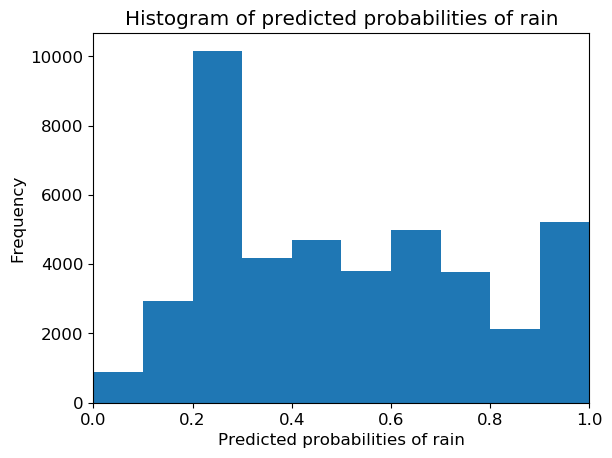

In [29]:
# histogram for predcited probability
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_predict_probability_rainfall, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

In [30]:
# observations
# We can see that the above histogram is highly positive skewed.
# The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.
# There are small number of observations with probability > 0.5.
# So, these small number of observations predict that there will be rain tomorrow.
# Majority of observations predict that there will be no rain tomorrow.

# the  graph shows both testing and traning data have accuracies almost same so no over fitting of model

Training score:  0.729081521230462
Testing score:  0.7289063596799101


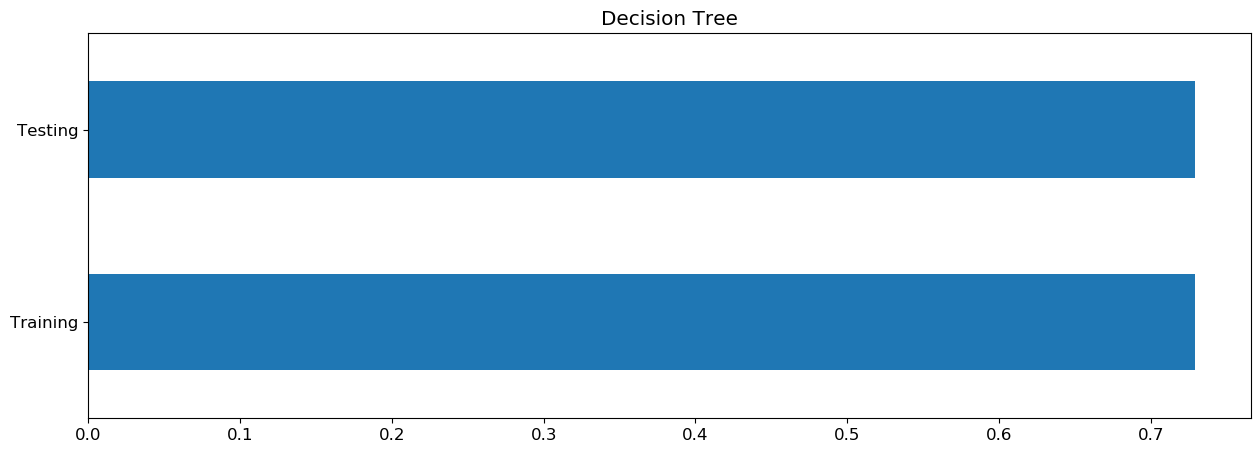

In [31]:
import matplotlib.pyplot as plt
log_training_score = clf_dt.score(X_train,y_train)
log_test_score = clf_dt.score(X_test,y_test)
model_score = pd.Series(data=[log_training_score,log_test_score],
                                index=['Training','Testing'])
fig= plt.figure(figsize=(15,5))
model_score.plot.barh()
plt.title('Decision Tree')
print('Training score: ',log_training_score)
print('Testing score: ',log_test_score)

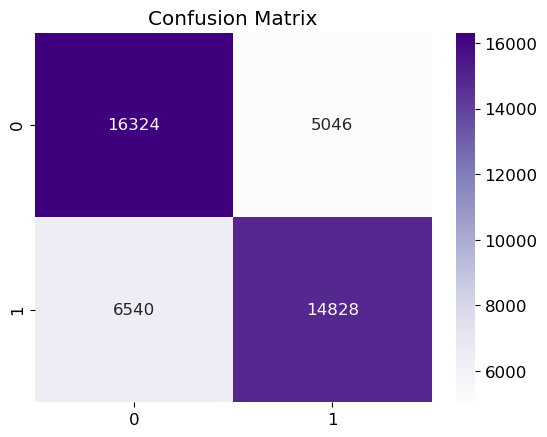

In [32]:
import seaborn as sns
plt.title("Confusion Matrix")
sns.heatmap(confusionMatrix,annot=True,cmap="Purples",fmt="d",cbar=True)

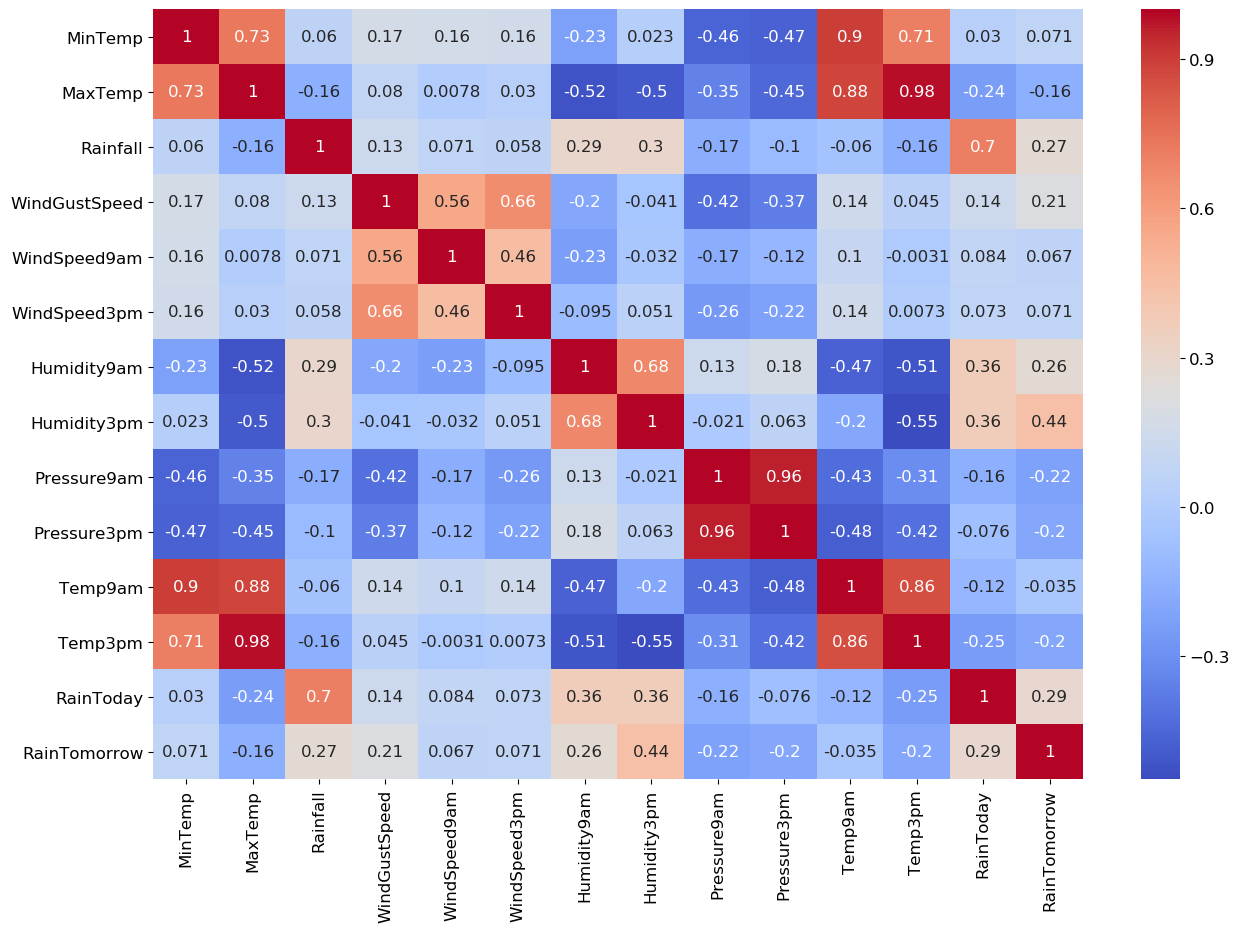

In [33]:
# multivarient analysis
plt.figure(figsize=(15,10))

sns.heatmap(corrMatrix,annot=True,cmap='coolwarm')
plt.show()


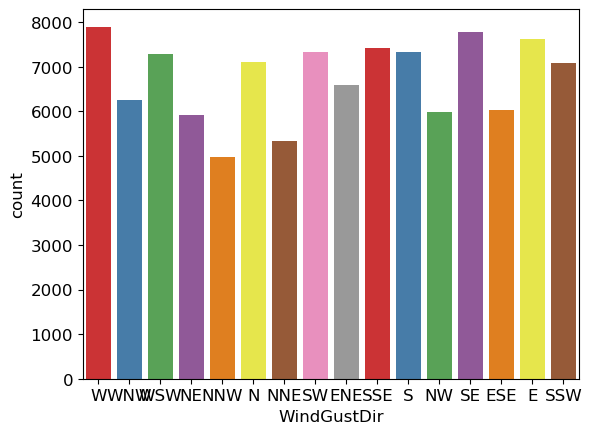

In [34]:
sns.countplot(x="WindGustDir", data=rainfall_eda, palette="Set1")
plt.show()

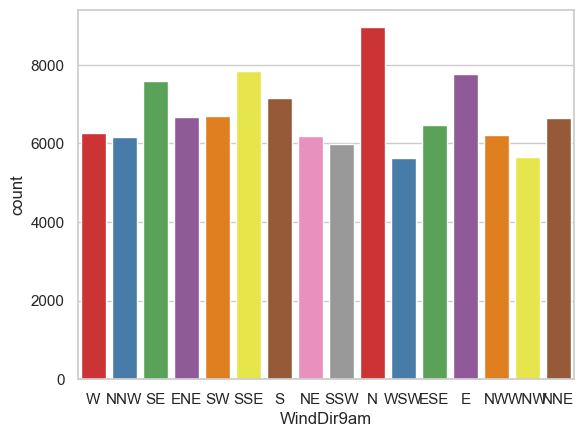

In [35]:
sns.set(style="whitegrid")
sns.countplot(x="WindDir9am", data=rainfall_eda, palette="Set1")
plt.show()